## Importing the libraries

In [30]:
import numpy as np # linear algebra
import pandas as pd # data manipulation

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Importing the dataset

In [31]:
# load the data
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [32]:
# Let's check shape (number of rows, number of columns)
data.shape

(1470, 35)

Means there are 1470 entries with 35 columns

In [33]:
# let's have a first look at our data
data.head() # first 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
# check for missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [35]:
# datatypes in the dataset
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [36]:
# columns of dataset
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
data.describe() # statistical details 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [38]:
data.describe(include = "object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


So, from the above statistical details we can see that `EmployeeCount`, `Over18`, `StandardHours` have only one unique value. These features aren't useful for us including `EmployeeNumber`, let's drop these columns.

In [39]:
# let's drop those columns
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64



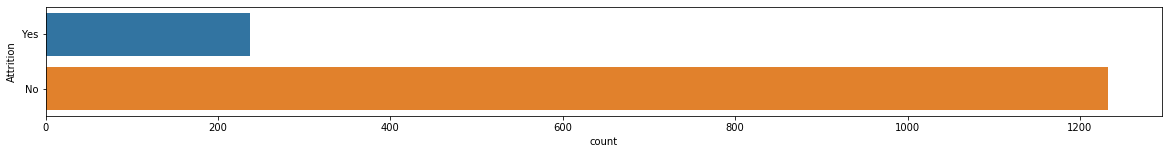

In [40]:
# let's have a look at our target column
print(data.Attrition.value_counts(normalize = True))
print()
plt.figure(figsize=(20,2))
sns.countplot(y = data["Attrition"])
plt.show()

Here we can see that its an imbalanced dataset where **84%** of employees did not leave the organization while **16%** left the organization.

### Numerical Features

In [41]:
# lets create a dataframe with only numeric variables
num_cols = pd.DataFrame()
for i in data.columns:
    if data[i].dtypes != "object":
        num_cols[i] = data[i] 

In [42]:
num_cols.shape

(1470, 23)

### Categorical Features

In [43]:
# now lets create a dataframe for categorical variables
cat_cols = pd.DataFrame()
for i in data.columns:
    if data[i].dtypes == "object":
        cat_cols[i] = data[i] 

In [44]:
cat_cols.shape

(1470, 8)

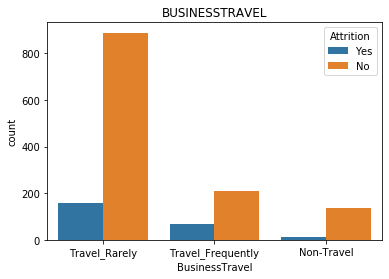

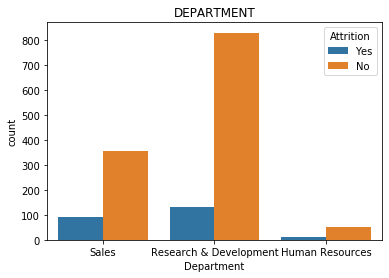

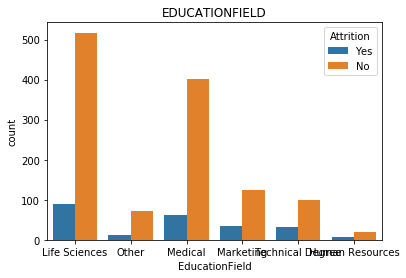

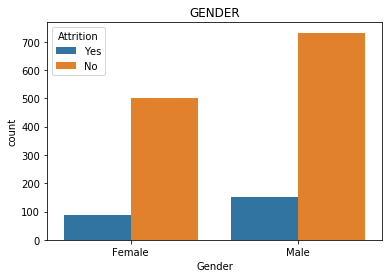

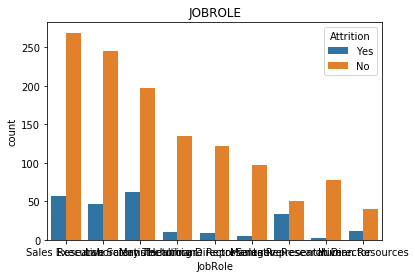

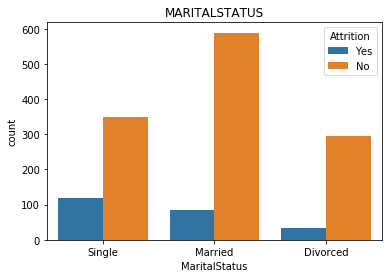

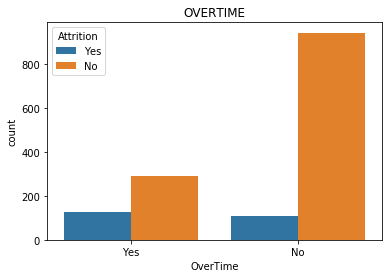

In [45]:
# lets visualize categorical features
cat = cat_cols.drop(["Attrition"], axis = 1)
for i in cat:
    sns.countplot(cat_cols[i], hue = cat_cols["Attrition"])
    plt.title(i.upper())
    plt.show()

From the above plots we can see some features have higher chances of Attrition.

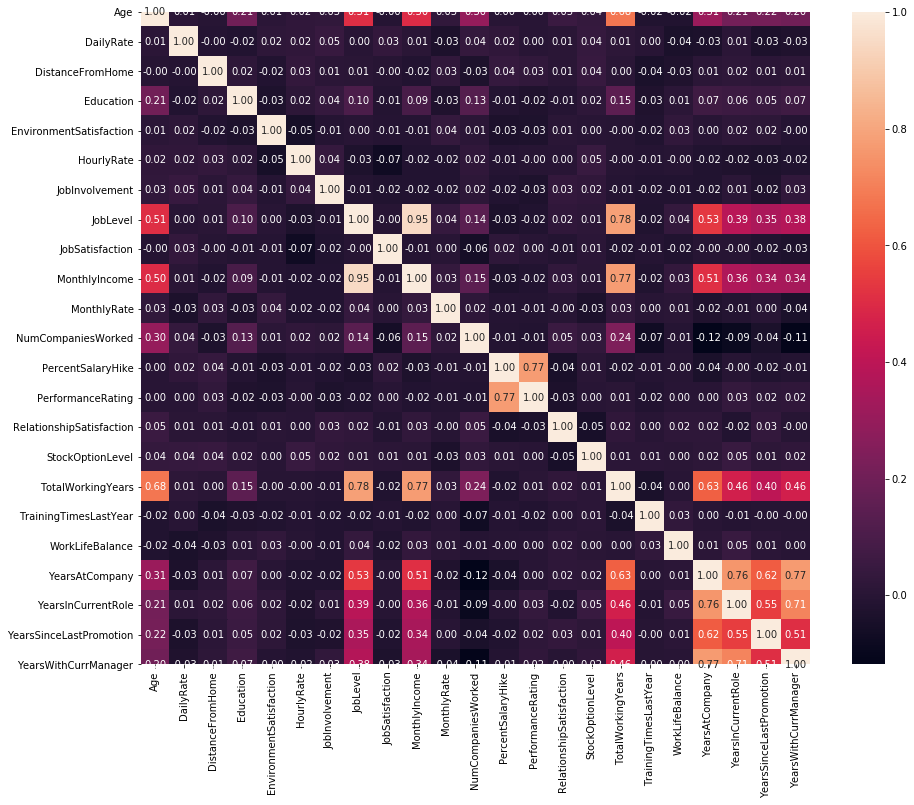

In [48]:
# heatmap to visualize features correlation
plt.figure(figsize=(15,12))
sns.heatmap(num_cols.corr(), annot = True, fmt = ".2f");

In [18]:
#Let's remove the strongly correlated variables
threshold = 0.7

# Absolute value correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)
print("Shape of dataset : {}".format(data.shape))

Shape of dataset : (1470, 26)


### Feature Encoding

In [19]:
# target column
target_col = data["Attrition"]

# columns with only two unique values
bin_cols = data.nunique()[data.nunique() == 2].keys().tolist()

In [20]:
# lets encode binary values
trans_bin = {'Attrition':{'Yes':1, 'No':0}, 'Gender':{'Female':0, 'Male':1}, 'OverTime':{'Yes':1,'No':0}}

data.replace(trans_bin, inplace=True)

In [21]:
# now lets transform categorical data into dummies
dummy_col = [column for column in data.drop(['Attrition',"Gender","OverTime"], axis=1).columns if data[column].nunique() < 20]
data = pd.get_dummies(data, columns=dummy_col, drop_first=True)

In [22]:
print(data.shape)

(1470, 98)


## Applying Machine Learning Algorithms

In [23]:
# lets divide dataset in x and y
X = data.drop(["Attrition"], axis = 1)
y = data["Attrition"]
print(X.shape)
print(y.shape)

(1470, 97)
(1470,)


In [24]:
# now let's split our dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

# let's check shape of the datasets
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1029, 97)
(1029,)
(441, 97)
(441,)


### Logistic Regression

In [25]:
# logistic regression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# predict on test data
y_test_pred = logit.predict(X_test)
# accuracy score
print("Result on test data : \n")
print("Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print()
#confusion matrix
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, y_test_pred)))

Result on test data : 

Accuracy Score : 0.88

Confusion Matrix : 
[[359  11]
 [ 43  28]]


### Random Forest Classifier

In [27]:
# random forest
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 40)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

We can perform hyperparameter tuning also to get optimal set of hyperparameters.

In [28]:
# let's predict on test data
y_test_pred = rfc.predict(X_test)
# accuracy score
print("Result on test data : \n")
print("Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print()
#confusion matrix
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, y_test_pred)))

Result on test data : 

Accuracy Score : 0.85

Confusion Matrix : 
[[370   0]
 [ 64   7]]


In [29]:
# Feature Importance
imp = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns = ['imp'])
imp = imp.sort_values(by ='imp', ascending = False)
imp.head(20)

,imp
Age,0.069720
DailyRate,0.060788
MonthlyRate,0.057571
YearsAtCompany,0.056602
HourlyRate,0.048924
DistanceFromHome,0.047972
OverTime,0.041741
MaritalStatus_Single,0.018483
BusinessTravel_Travel_Frequently,0.015417
JobLevel_2,0.015397


Featrue importance shows how much each feature contributed to the model.

As we know that our data is imbalanced so we can use some resampling techniques like **Undersampling**, **Oversampling**, or **Synthetic Minority Over-sampling** to balance it.